In [49]:
from flows.candidate_link import find_candidate_amino_atom
from flows.post_process import build_la_ra_mapping_by_idx
from flows.utils import save_results
from objects.data_builder import DataBuilder
from models.configs import model_configs
from models import create_model
from utils import *
import configs
import time
import sys
import os

In [105]:
DataBuilder().init(configs.data_path)
list_receptors, list_ligands = DataBuilder().get_atom_data()

In [114]:
list_ligands[1].ligand_df.df["ATOM"]

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
0,ATOM,9,,N,,ALA,,C,2,,...,-12.583,6.625,72.374,1.0,41.65,,,N,NaN,11
1,ATOM,10,,CA,,ALA,,C,2,,...,-13.166,7.625,71.495,1.0,42.30,,,C,NaN,12
2,ATOM,11,,C,,ALA,,C,2,,...,-12.115,8.750,71.241,1.0,41.96,,,C,NaN,13
3,ATOM,12,,O,,ALA,,C,2,,...,-11.466,9.159,72.125,1.0,41.95,,,O,NaN,14
4,ATOM,13,,CB,,ALA,,C,2,,...,-14.397,8.218,72.132,1.0,36.98,,,C,NaN,15
5,ATOM,14,,N,,VAL,,C,3,,...,-11.943,9.281,69.911,1.0,34.91,,,N,NaN,16
6,ATOM,15,,CA,,VAL,,C,3,,...,-10.955,10.336,69.666,1.0,36.29,,,C,NaN,17
7,ATOM,16,,C,,VAL,,C,3,,...,-11.663,11.606,69.273,1.0,40.78,,,C,NaN,18
8,ATOM,17,,O,,VAL,,C,3,,...,-12.381,11.617,68.328,1.0,36.69,,,O,NaN,19
9,ATOM,18,,CB,,VAL,,C,3,,...,-10.004,9.895,68.515,1.0,37.53,,,C,NaN,20


In [102]:
list_receptors[0].receptor_df.df["ATOM"]

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
0,ATOM,1,,N,,SER,,A,1,,...,-32.123,9.125,33.767,1.0,39.47,,,N,NaN,2
1,ATOM,2,,HN1,,SER,,A,1,,...,-31.910,10.025,34.198,1.0,0.00,,,H,NaN,3
2,ATOM,3,,HN2,,SER,,A,1,,...,-32.985,9.161,33.222,1.0,0.00,,,H,NaN,4
3,ATOM,4,,HN3,,SER,,A,1,,...,-31.474,8.904,33.012,1.0,0.00,,,H,NaN,5
4,ATOM,5,,CA,,SER,,A,1,,...,-32.163,8.071,34.771,1.0,37.84,,,C,NaN,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2883,ATOM,2884,,CD,,GLN,,A,306,,...,-43.013,2.097,29.893,1.0,80.97,,,C,NaN,2885
2884,ATOM,2885,,OE1,,GLN,,A,306,,...,-42.442,3.067,30.391,1.0,87.44,,,O,NaN,2886
2885,ATOM,2886,,NE2,,GLN,,A,306,,...,-42.775,1.687,28.651,1.0,73.38,,,N,NaN,2887
2886,ATOM,2887,,1HE2,,GLN,,A,306,,...,-43.248,0.883,28.238,1.0,0.00,,,H,NaN,2888


In [1]:
from rdkit.Chem.rdmolfiles import MolFromPDBFile, MolToPDBFile
from rdkit.Chem.rdmolops import AddHs
from rdkit.Chem.Draw import MolToImage
from rdkit.Chem.Lipinski import *

# Setting for auto draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = 1000,1000

In [14]:
ligand = MolFromPDBFile("data/ligands/substr.pdb")
ligand != None

True

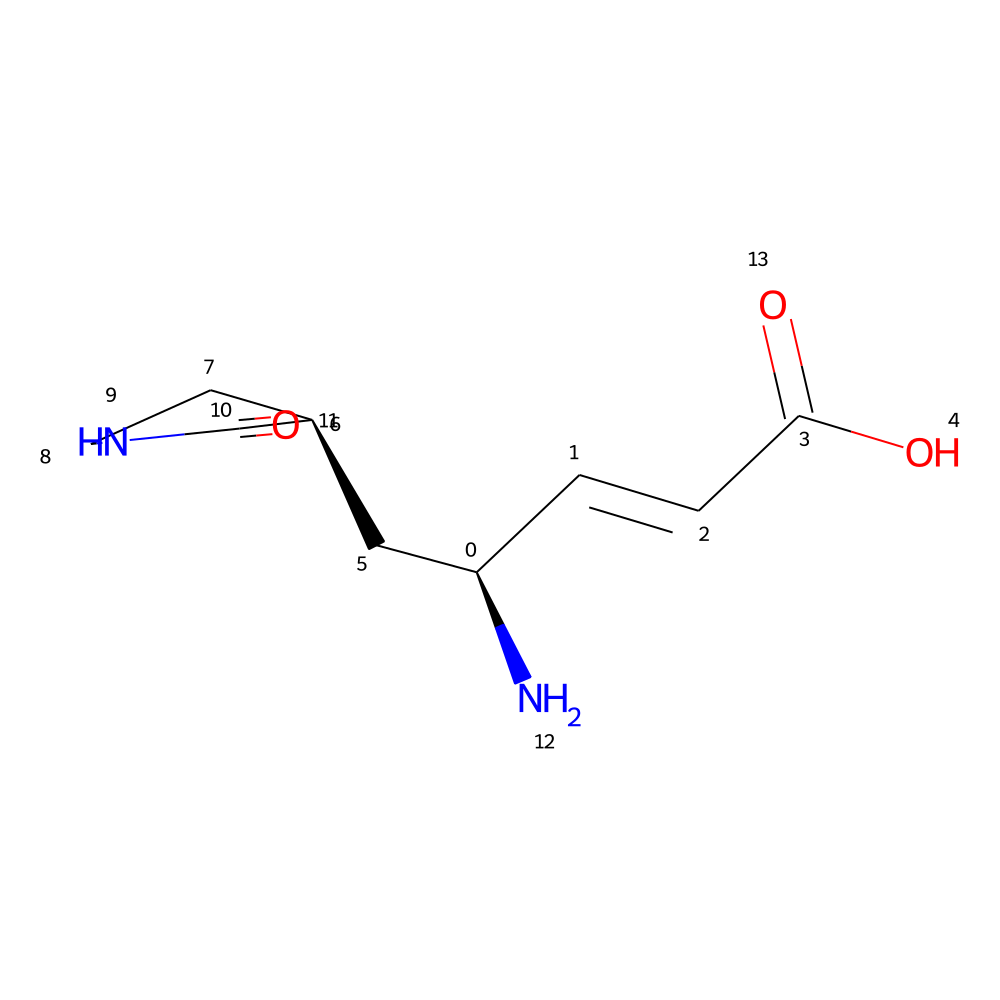

In [15]:
ligand
# MolToImage(ligand, size=(500, 500))

In [29]:
receptor = MolFromPDBFile("data/receptors/Receptor_vidok.pdb")
receptor != None

True

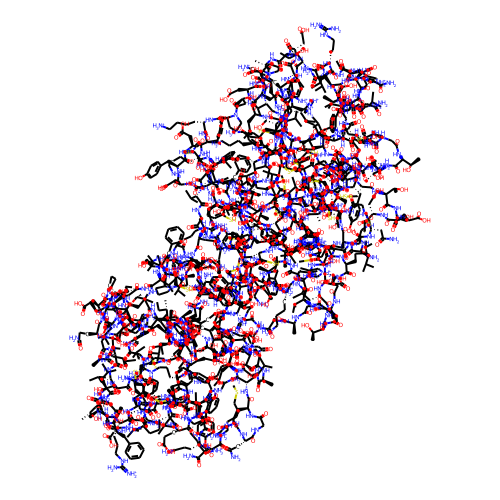

In [39]:
MolToImage(receptor, size=(500, 500))

In [37]:
print(NumHAcceptors(ligand))
print(NumHDonors(receptor))

11
478


In [40]:
print(NumHAcceptors(receptor))
print(NumHDonors(ligand))

440
9


In [44]:
class _ChemicalFeaturesFactory:
  """This is a singleton class for RDKit base features."""
  _instance = None

  @classmethod
  def get_instance(cls):
    try:
      from rdkit import RDConfig
      from rdkit.Chem import ChemicalFeatures
    except ModuleNotFoundError:
      raise ImportError("This class requires RDKit to be installed.")

    if not cls._instance:
      fdefName = os.path.join(RDConfig.RDDataDir, 'BaseFeatures.fdef')
      cls._instance = ChemicalFeatures.BuildFeatureFactory(fdefName)
    return cls._instance

In [47]:
def construct_hydrogen_bonding_info(mol):
  """Construct hydrogen bonding infos about a molecule.
  Parameters
  ---------
  mol: rdkit.Chem.rdchem.Mol
    RDKit mol object
  Returns
  -------
  List[Tuple[int, str]]
    A list of tuple `(atom_index, hydrogen_bonding_type)`.
    The `hydrogen_bonding_type` value is "Acceptor" or "Donor".
  """
  factory = _ChemicalFeaturesFactory.get_instance()
  feats = factory.GetFeaturesForMol(mol)
  hydrogen_bonding = []
  for f in feats:
    hydrogen_bonding.append((f.GetAtomIds()[0], f.GetFamily()))
  return hydrogen_bonding

In [52]:
def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

In [69]:
construct_hydrogen_bonding_info(ligand)

[(4, 'Donor'),
 (7, 'Donor'),
 (8, 'Donor'),
 (13, 'Donor'),
 (20, 'Donor'),
 (36, 'Donor'),
 (38, 'Donor'),
 (39, 'Donor'),
 (40, 'Donor'),
 (3, 'Acceptor'),
 (7, 'Acceptor'),
 (11, 'Acceptor'),
 (16, 'Acceptor'),
 (23, 'Acceptor'),
 (38, 'Acceptor'),
 (40, 'Acceptor'),
 (42, 'Acceptor'),
 (8, 'PosIonizable'),
 (36, 'PosIonizable'),
 (17, 'Hydrophobe'),
 (25, 'Hydrophobe'),
 (33, 'Hydrophobe'),
 (48, 'Hydrophobe'),
 (24, 'Hydrophobe'),
 (29, 'Hydrophobe'),
 (30, 'Hydrophobe'),
 (32, 'Hydrophobe'),
 (43, 'LumpedHydrophobe'),
 (17, 'LumpedHydrophobe'),
 (25, 'LumpedHydrophobe')]

In [77]:
re = construct_hydrogen_bonding_info(receptor)
with open("receptor_hydrogen_bonding.txt", "w") as f:
    f.write(str(re))